# Import Libraries

In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow import keras

In [2]:
# Function to preprocess images
def preprocess_image(image):
    # Resize image to a fixed size
    resized_image = cv2.resize(image, (224, 224))
    # Normalize pixel values (assuming images are in the range [0, 255])
    normalized_image = resized_image / 255.0
    return normalized_image

# Data Pre-processing

## Import Data and separate into Images and Labels

In [3]:
# Directory containing your images
directory = 'C:/Users/Duhyeon/Desktop/UBC/UBC Research/Work_Learn/SPAs Data/Simulation Data/Pictures/Real Trajectory Pictures'

# List all files in the directory
files = os.listdir(directory)

# Lists to store images and labelsqA
images = []
labels = []

# Iterate over each file
for file in files:
    if file.endswith('.jpg') or file.endswith('.jpeg') or file.endswith('.png'):
        file_path = os.path.join(directory, file)
        # Read the image
        image = cv2.imread(file_path)
        
        # convert the input image to grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
        # apply thresholding to convert grayscale to binary image
        ret,thresh = cv2.threshold(gray,224,224,0)
        
        # Preprocess the image
        preprocessed_image = preprocess_image(thresh)
        
        # Add the preprocessed image to the list of images
        images.append(preprocessed_image)
        
        label = file.split('.')[0]  # Extract label from file name
        labels.append(label)

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

In [4]:
np.shape(images)

(39, 224, 224)

## Label Encoding

In [5]:
# Label Encoding
from sklearn import preprocessing
from keras.utils import to_categorical

le = preprocessing.LabelEncoder()

# Fit the encoder to the categories and transform (encode) them
encoded_labels = le.fit_transform(labels)

# Now to decode, use inverse_transform
decoded_labels = le.inverse_transform(encoded_labels)

# Print encoded and decoded results for comparison
print("Encoded Labels:", encoded_labels)
print("Decoded Labels:", decoded_labels)

Encoded Labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38]
Decoded Labels: ['DS10DS10_0_1' 'DS10DS10_2_0' 'DS10DS10_2_1' 'DS10DS10_3_0'
 'DS10DS10_3_1' 'DS10DS10_3_2' 'DS10DS10_6_1' 'DS10DS10_6_2'
 'DS10DS10_6_3' 'DS10DS30_2_1' 'DS10DS30_3_1' 'DS10DS30_3_2'
 'DS30DS30_2_1' 'DS30DS30_3_1' 'DS30DS30_3_2' 'DS30DS30_6_0'
 'DS30DS30_6_1' 'DS30DS30_6_2' 'DS30DS30_6_3' 'DS30E30_1_1' 'DS30E30_2_0'
 'DS30E30_2_1' 'DS30E30_2_2' 'DS30E30_3_0' 'DS30E30_3_1' 'DS30E30_3_2'
 'DS30E30_3_3' 'DS30E30_6_1' 'DS30E30_6_2' 'DS30E30_6_3' 'DS30E30_6_6'
 'E30DS30_0_1' 'E30DS30_2_1' 'E30DS30_3_1' 'E30DS30_3_2' 'E30DS30_6_0'
 'E30DS30_6_1' 'E30DS30_6_2' 'E30DS30_6_3']


In [6]:
# Label encoding, Using it for Calculating R2, MSE, RMSE, MAE

le.fit(labels)
target_encoded = to_categorical(le.transform(labels), 39) # Number has to be changed
np.shape(target_encoded)

(39, 39)

## Split Dataset into Train and Test Set

In [7]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, target_encoded, test_size=0.2, random_state=42)

# Create CNN Model

In [8]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('patience=10, restore_best_weights=True')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [9]:
# Define CNN model architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(39, activation='softmax') # Number has to be changed
])

In [10]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
# Train the model
history = model.fit(images, encoded_labels, epochs=50,
                    validation_data=(images, encoded_labels),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/50
2/2 [==============================] - ETA: 0s - loss: 4.1063 - accuracy: 0.0513

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 4s 2s/step - loss: 4.1063 - accuracy: 0.0513 - val_loss: 3.9066 - val_accuracy: 0.0256
Epoch 2/50
2/2 [==============================] - ETA: 0s - loss: 4.1999 - accuracy: 0.0513

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 3s 2s/step - loss: 4.1999 - accuracy: 0.0513 - val_loss: 3.6850 - val_accuracy: 0.0256
Epoch 3/50
2/2 [==============================] - ETA: 0s - loss: 3.7112 - accuracy: 0.0000e+00

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 3s 2s/step - loss: 3.7112 - accuracy: 0.0000e+00 - val_loss: 3.6600 - val_accuracy: 0.0256
Epoch 4/50
2/2 [==============================] - ETA: 0s - loss: 3.6594 - accuracy: 0.0000e+00

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 3s 2s/step - loss: 3.6594 - accuracy: 0.0000e+00 - val_loss: 3.6462 - val_accuracy: 0.0256
Epoch 5/50
2/2 [==============================] - ETA: 0s - loss: 3.6674 - accuracy: 0.0256

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 3s 2s/step - loss: 3.6674 - accuracy: 0.0256 - val_loss: 3.6260 - val_accuracy: 0.1282
Epoch 6/50
2/2 [==============================] - ETA: 0s - loss: 3.6581 - accuracy: 0.0000e+00

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 2s 2s/step - loss: 3.6581 - accuracy: 0.0000e+00 - val_loss: 3.6184 - val_accuracy: 0.1282
Epoch 7/50
2/2 [==============================] - ETA: 0s - loss: 3.6400 - accuracy: 0.0513

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 3s 2s/step - loss: 3.6400 - accuracy: 0.0513 - val_loss: 3.5640 - val_accuracy: 0.1282
Epoch 8/50
2/2 [==============================] - ETA: 0s - loss: 3.5745 - accuracy: 0.1282

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 3s 2s/step - loss: 3.5745 - accuracy: 0.1282 - val_loss: 3.4665 - val_accuracy: 0.1026
Epoch 9/50
2/2 [==============================] - ETA: 0s - loss: 3.5229 - accuracy: 0.0256    

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 2s 2s/step - loss: 3.5229 - accuracy: 0.0256 - val_loss: 3.3560 - val_accuracy: 0.2564
Epoch 10/50
2/2 [==============================] - ETA: 0s - loss: 3.3669 - accuracy: 0.1795

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 2s 2s/step - loss: 3.3669 - accuracy: 0.1795 - val_loss: 3.1494 - val_accuracy: 0.2308
Epoch 11/50
2/2 [==============================] - ETA: 0s - loss: 3.1725 - accuracy: 0.1795

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 2s 2s/step - loss: 3.1725 - accuracy: 0.1795 - val_loss: 2.7961 - val_accuracy: 0.2051
Epoch 12/50
2/2 [==============================] - ETA: 0s - loss: 3.0485 - accuracy: 0.1538

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 3s 2s/step - loss: 3.0485 - accuracy: 0.1538 - val_loss: 2.5235 - val_accuracy: 0.2564
Epoch 13/50
2/2 [==============================] - ETA: 0s - loss: 2.5191 - accuracy: 0.3333

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 2s 2s/step - loss: 2.5191 - accuracy: 0.3333 - val_loss: 2.1612 - val_accuracy: 0.3077
Epoch 14/50
2/2 [==============================] - ETA: 0s - loss: 2.3095 - accuracy: 0.3333

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 3s 3s/step - loss: 2.3095 - accuracy: 0.3333 - val_loss: 1.8705 - val_accuracy: 0.4359
Epoch 15/50
2/2 [==============================] - ETA: 0s - loss: 2.1344 - accuracy: 0.3333

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 4s 3s/step - loss: 2.1344 - accuracy: 0.3333 - val_loss: 1.6563 - val_accuracy: 0.4103
Epoch 16/50
2/2 [==============================] - ETA: 0s - loss: 2.1280 - accuracy: 0.3846

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 4s 2s/step - loss: 2.1280 - accuracy: 0.3846 - val_loss: 1.4945 - val_accuracy: 0.5128
Epoch 17/50
2/2 [==============================] - ETA: 0s - loss: 1.6775 - accuracy: 0.4615

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 4s 3s/step - loss: 1.6775 - accuracy: 0.4615 - val_loss: 1.3176 - val_accuracy: 0.5385
Epoch 18/50
2/2 [==============================] - ETA: 0s - loss: 1.9211 - accuracy: 0.4359

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 3s 2s/step - loss: 1.9211 - accuracy: 0.4359 - val_loss: 1.1024 - val_accuracy: 0.6154
Epoch 19/50
2/2 [==============================] - ETA: 0s - loss: 1.9025 - accuracy: 0.4359

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 3s 2s/step - loss: 1.9025 - accuracy: 0.4359 - val_loss: 1.0366 - val_accuracy: 0.6923
Epoch 20/50
2/2 [==============================] - ETA: 0s - loss: 1.5049 - accuracy: 0.5128

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 3s 2s/step - loss: 1.5049 - accuracy: 0.5128 - val_loss: 1.0654 - val_accuracy: 0.7436
Epoch 21/50
2/2 [==============================] - ETA: 0s - loss: 1.3061 - accuracy: 0.5641

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 3s 2s/step - loss: 1.3061 - accuracy: 0.5641 - val_loss: 0.9799 - val_accuracy: 0.6667
Epoch 22/50
2/2 [==============================] - ETA: 0s - loss: 1.4248 - accuracy: 0.5128

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 3s 2s/step - loss: 1.4248 - accuracy: 0.5128 - val_loss: 0.8779 - val_accuracy: 0.6923
Epoch 23/50
2/2 [==============================] - ETA: 0s - loss: 1.2378 - accuracy: 0.5641

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 2s 2s/step - loss: 1.2378 - accuracy: 0.5641 - val_loss: 0.8133 - val_accuracy: 0.6923
Epoch 24/50
2/2 [==============================] - ETA: 0s - loss: 1.0217 - accuracy: 0.6923

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 3s 2s/step - loss: 1.0217 - accuracy: 0.6923 - val_loss: 0.7793 - val_accuracy: 0.7436
Epoch 25/50
2/2 [==============================] - ETA: 0s - loss: 1.3365 - accuracy: 0.5128

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 3s 2s/step - loss: 1.3365 - accuracy: 0.5128 - val_loss: 0.7205 - val_accuracy: 0.7949
Epoch 26/50
2/2 [==============================] - ETA: 0s - loss: 1.3356 - accuracy: 0.5641

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 3s 3s/step - loss: 1.3356 - accuracy: 0.5641 - val_loss: 0.6300 - val_accuracy: 0.7692
Epoch 27/50
2/2 [==============================] - ETA: 0s - loss: 1.1396 - accuracy: 0.6923

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 2s 2s/step - loss: 1.1396 - accuracy: 0.6923 - val_loss: 0.5937 - val_accuracy: 0.8205
Epoch 28/50
2/2 [==============================] - ETA: 0s - loss: 0.8938 - accuracy: 0.6923

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 3s 2s/step - loss: 0.8938 - accuracy: 0.6923 - val_loss: 0.5693 - val_accuracy: 0.7949
Epoch 29/50
2/2 [==============================] - ETA: 0s - loss: 0.8879 - accuracy: 0.6410

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 2s 2s/step - loss: 0.8879 - accuracy: 0.6410 - val_loss: 0.5368 - val_accuracy: 0.7949
Epoch 30/50
2/2 [==============================] - ETA: 0s - loss: 0.8472 - accuracy: 0.6410

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 3s 2s/step - loss: 0.8472 - accuracy: 0.6410 - val_loss: 0.5240 - val_accuracy: 0.7949
Epoch 31/50
2/2 [==============================] - ETA: 0s - loss: 0.8378 - accuracy: 0.6923

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 2s 2s/step - loss: 0.8378 - accuracy: 0.6923 - val_loss: 0.5088 - val_accuracy: 0.8462
Epoch 32/50
2/2 [==============================] - ETA: 0s - loss: 0.8565 - accuracy: 0.6410

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 2s 2s/step - loss: 0.8565 - accuracy: 0.6410 - val_loss: 0.4982 - val_accuracy: 0.8205
Epoch 33/50
2/2 [==============================] - ETA: 0s - loss: 0.8398 - accuracy: 0.7436

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 2s 2s/step - loss: 0.8398 - accuracy: 0.7436 - val_loss: 0.4867 - val_accuracy: 0.8205
Epoch 34/50
2/2 [==============================] - ETA: 0s - loss: 0.6286 - accuracy: 0.7949

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 2s 2s/step - loss: 0.6286 - accuracy: 0.7949 - val_loss: 0.4639 - val_accuracy: 0.8462
Epoch 35/50
2/2 [==============================] - ETA: 0s - loss: 0.6356 - accuracy: 0.7436

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 2s 2s/step - loss: 0.6356 - accuracy: 0.7436 - val_loss: 0.4264 - val_accuracy: 0.8205
Epoch 36/50
2/2 [==============================] - ETA: 0s - loss: 0.8326 - accuracy: 0.7436

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 3s 2s/step - loss: 0.8326 - accuracy: 0.7436 - val_loss: 0.3971 - val_accuracy: 0.8205
Epoch 37/50
2/2 [==============================] - ETA: 0s - loss: 0.7016 - accuracy: 0.7436

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 3s 2s/step - loss: 0.7016 - accuracy: 0.7436 - val_loss: 0.3932 - val_accuracy: 0.8462
Epoch 38/50
2/2 [==============================] - ETA: 0s - loss: 0.6746 - accuracy: 0.7949

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 3s 2s/step - loss: 0.6746 - accuracy: 0.7949 - val_loss: 0.3748 - val_accuracy: 0.8462
Epoch 39/50
2/2 [==============================] - ETA: 0s - loss: 0.5930 - accuracy: 0.7436

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 2s 2s/step - loss: 0.5930 - accuracy: 0.7436 - val_loss: 0.3523 - val_accuracy: 0.8462
Epoch 40/50
2/2 [==============================] - ETA: 0s - loss: 0.6722 - accuracy: 0.7692

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 3s 2s/step - loss: 0.6722 - accuracy: 0.7692 - val_loss: 0.3337 - val_accuracy: 0.8974
Epoch 41/50
2/2 [==============================] - ETA: 0s - loss: 0.5304 - accuracy: 0.7949

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 3s 2s/step - loss: 0.5304 - accuracy: 0.7949 - val_loss: 0.3004 - val_accuracy: 0.8718
Epoch 42/50
2/2 [==============================] - ETA: 0s - loss: 0.4384 - accuracy: 0.7949

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 3s 2s/step - loss: 0.4384 - accuracy: 0.7949 - val_loss: 0.2820 - val_accuracy: 0.8462
Epoch 43/50
2/2 [==============================] - ETA: 0s - loss: 0.6279 - accuracy: 0.7436

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 2s 2s/step - loss: 0.6279 - accuracy: 0.7436 - val_loss: 0.2668 - val_accuracy: 0.8718
Epoch 44/50
2/2 [==============================] - ETA: 0s - loss: 0.5419 - accuracy: 0.8462

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 2s 2s/step - loss: 0.5419 - accuracy: 0.8462 - val_loss: 0.2367 - val_accuracy: 0.9487
Epoch 45/50
2/2 [==============================] - ETA: 0s - loss: 0.3020 - accuracy: 0.8974

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 2s 2s/step - loss: 0.3020 - accuracy: 0.8974 - val_loss: 0.2301 - val_accuracy: 0.9231
Epoch 46/50
2/2 [==============================] - ETA: 0s - loss: 0.6475 - accuracy: 0.8205

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 2s 2s/step - loss: 0.6475 - accuracy: 0.8205 - val_loss: 0.2504 - val_accuracy: 0.9231
Epoch 47/50
2/2 [==============================] - ETA: 0s - loss: 0.4918 - accuracy: 0.7949

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 2s 2s/step - loss: 0.4918 - accuracy: 0.7949 - val_loss: 0.2747 - val_accuracy: 0.8974
Epoch 48/50
2/2 [==============================] - ETA: 0s - loss: 0.4857 - accuracy: 0.8205

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 2s 2s/step - loss: 0.4857 - accuracy: 0.8205 - val_loss: 0.2938 - val_accuracy: 0.8974
Epoch 49/50
2/2 [==============================] - ETA: 0s - loss: 0.4587 - accuracy: 0.8718

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 2s 2s/step - loss: 0.4587 - accuracy: 0.8718 - val_loss: 0.2865 - val_accuracy: 0.8718
Epoch 50/50
2/2 [==============================] - ETA: 0s - loss: 0.4276 - accuracy: 0.8718

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 2s 2s/step - loss: 0.4276 - accuracy: 0.8718 - val_loss: 0.2701 - val_accuracy: 0.8974


# Evaluating the Model

In [16]:
# Evaluating the model
model.evaluate(images, encoded_labels)

2/2 [==============================] - 0s 45ms/step - loss: 0.2701 - accuracy: 0.8974


[0.270120769739151, 0.8974359035491943]

In [15]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


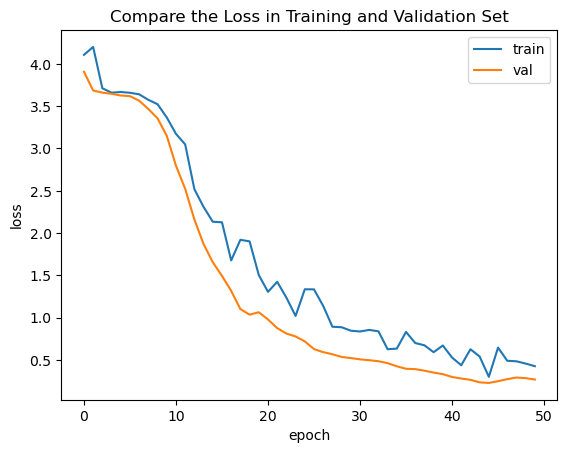

In [14]:
# Plot Loss of both training and validation set
import matplotlib.pyplot as plt

plt.title('Compare the Loss in Training and Validation Set')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

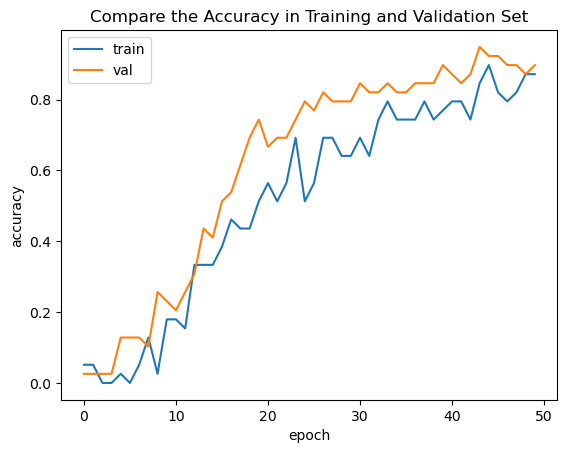

In [17]:
# Plot Loss of both training and validation set

plt.title('Compare the Accuracy in Training and Validation Set')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'val'])
plt.show()

In [18]:
y_test

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.,

## Confusion Matrix

2/2 [==============================] - 0s 44ms/step
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


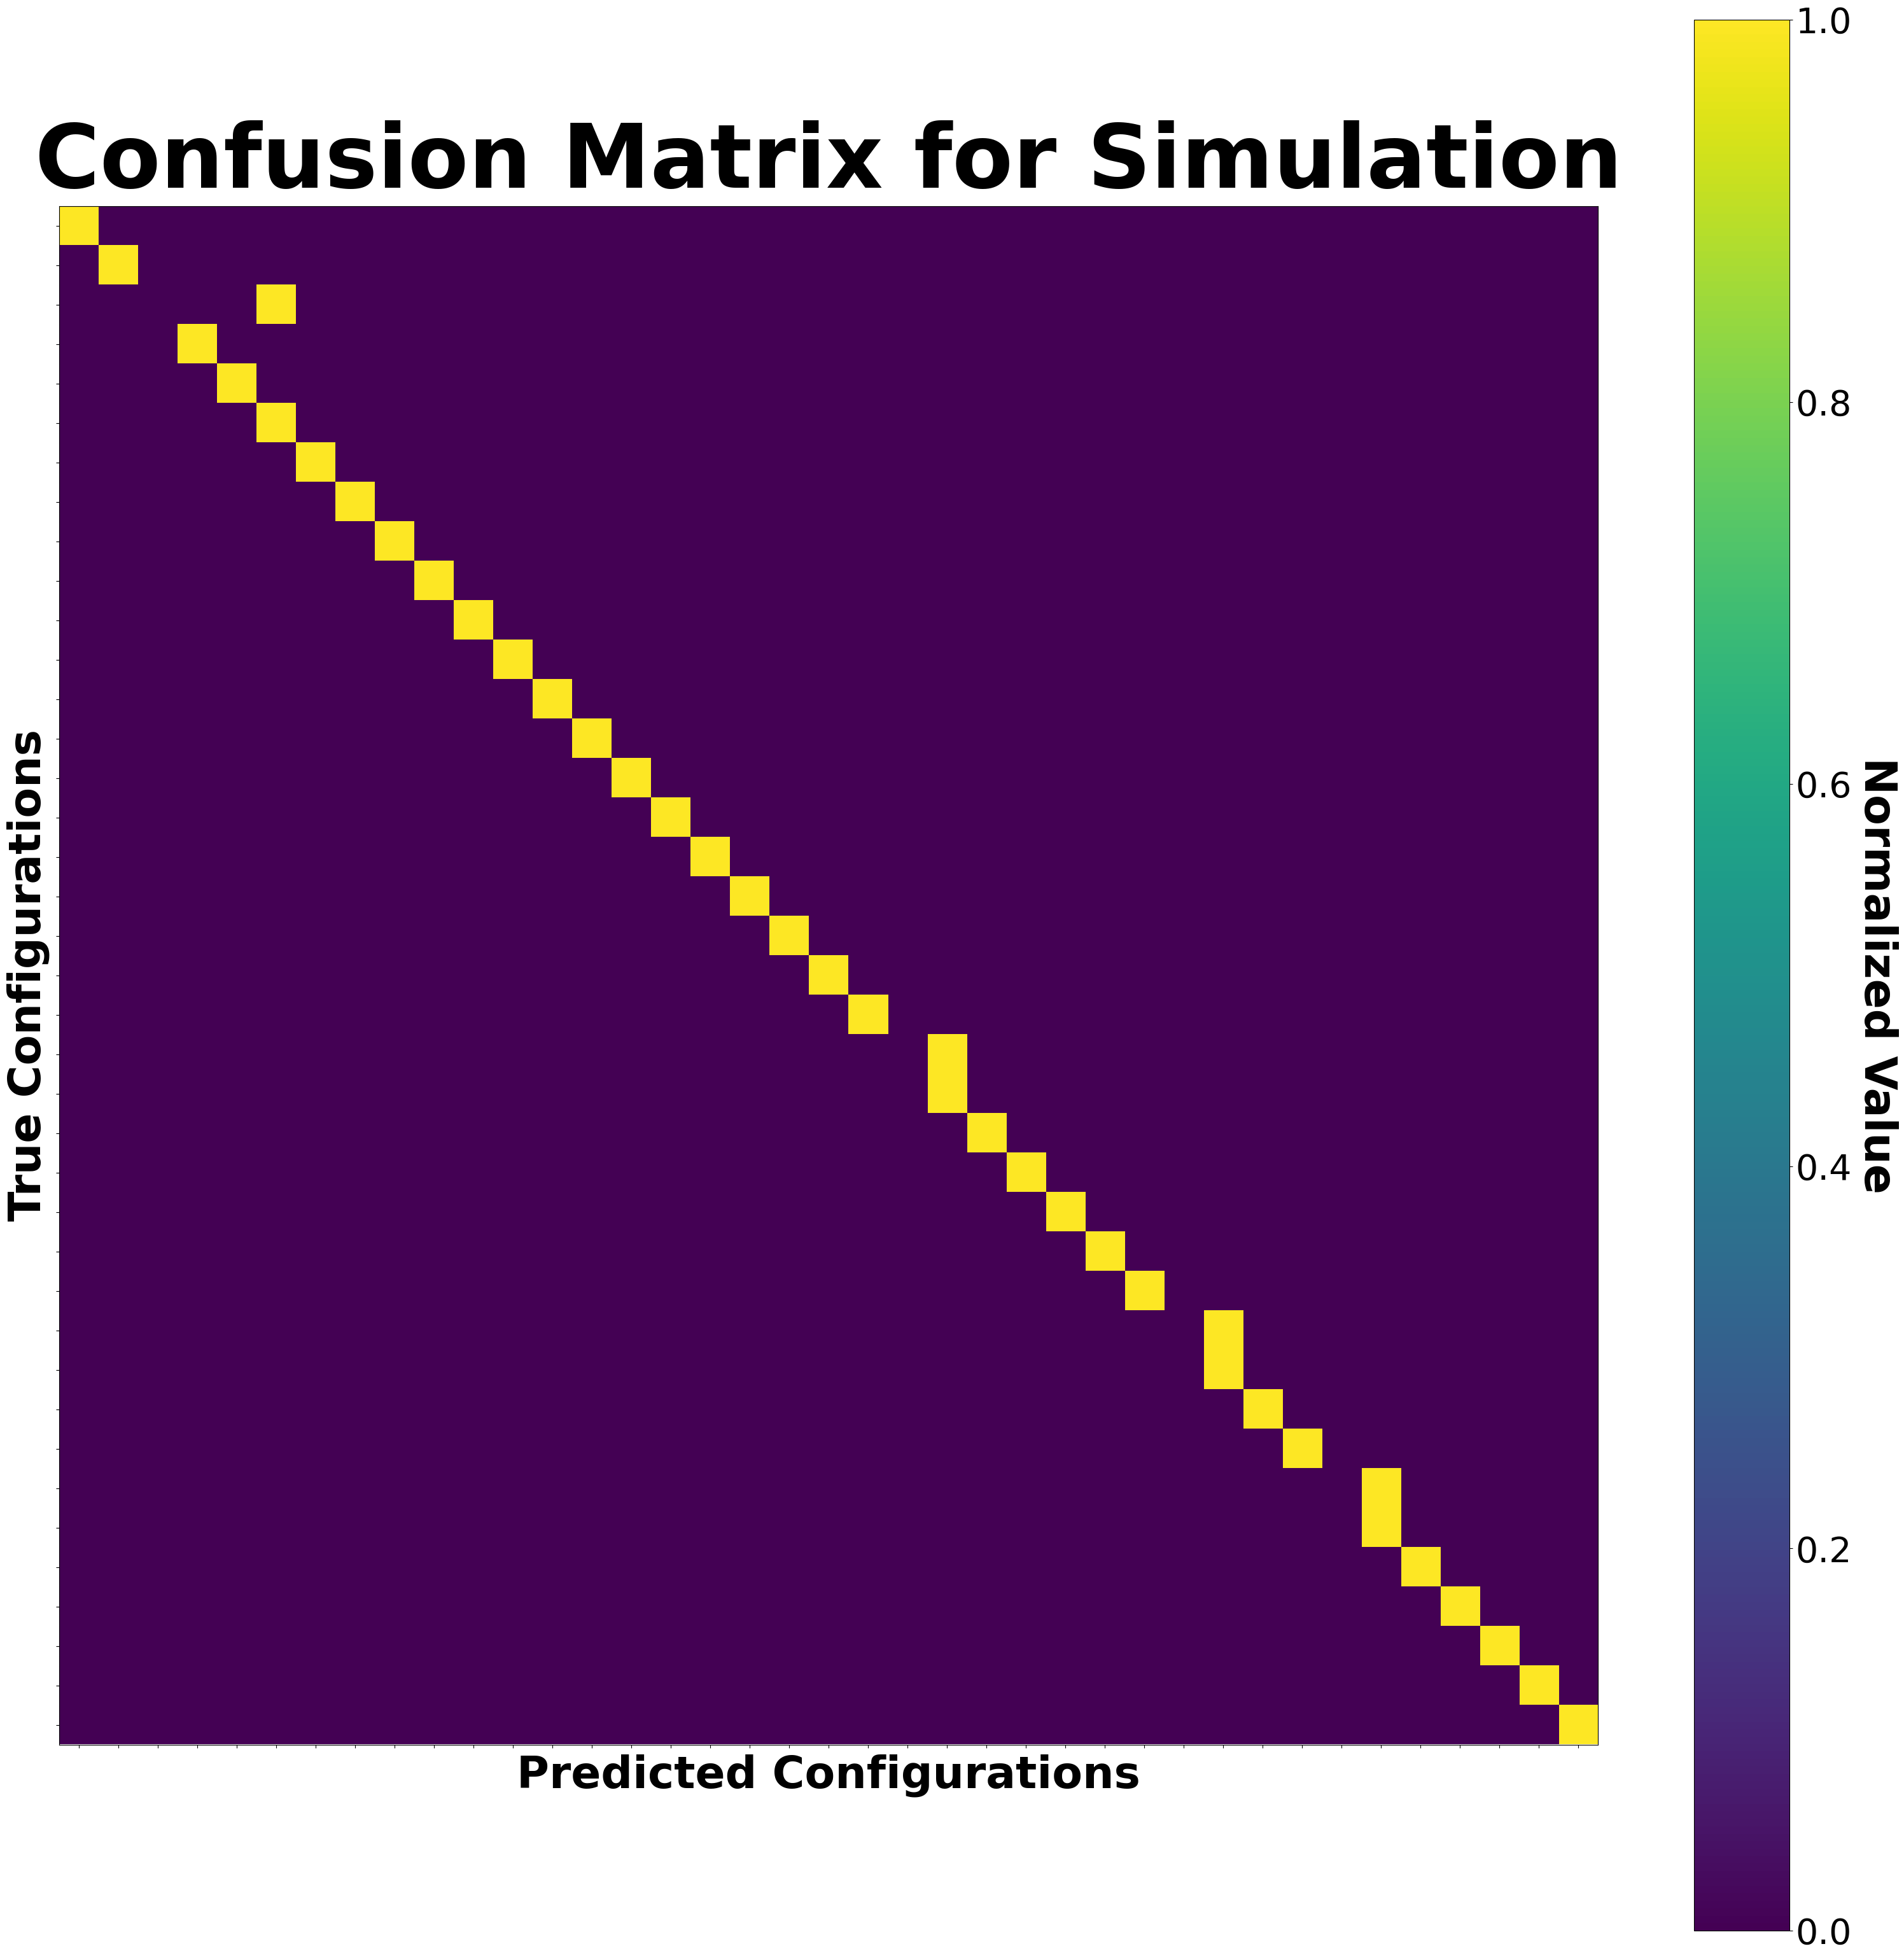

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get predictions
predictions = model.predict(images)

# Convert predictions to labels
predicted_labels = np.argmax(predictions, axis=1)
# Convert target labels back to original labels
predicted_labels = le.inverse_transform(predicted_labels)

# Get true labels
true_labels = decoded_labels

# Generate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Normalize the confusion matrix to show values between 0 and 1
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Print normalized confusion matrix
print(cm_normalized)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=decoded_labels)
fig, ax = plt.subplots(figsize=(39,39))
disp.plot(ax=ax, cmap='viridis', values_format='.2f', colorbar=False) # Disable the automatic color bar
ax.set_title('Confusion Matrix for Simulation', fontsize = 100, fontweight = 'bold')  # Set the title font
ax.set_xlabel('Predicted Configurations', fontsize = 50, fontweight = 'bold')  # Set the x-axis label
ax.set_ylabel('True Configurations', fontsize = 50, fontweight = 'bold')       # Set the y-axis label

# Remove the text from the matrix cells
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.texts[i * cm.shape[1] + j].set_visible(False)
        
# Hide tick labels
ax.set_xticklabels([])
ax.set_yticklabels([])

# Add a single color bar
cbar = fig.colorbar(disp.im_, ax=ax)
cbar.ax.set_ylabel('Normalized Value', rotation=-90, va="bottom", fontsize=50, fontweight = 'bold')  # Increase font size of the color bar label
cbar.ax.tick_params(labelsize=40)  # Increase font size of the color bar ticks

plt.show()

## R-sqaured value, MSE, RMSE, MAE 

In [20]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Predict the trainig & validation data
y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_test)

# Calculate the R-squared value
r2_train = r2_score(y_train, y_pred_train)
r2_val = r2_score(y_test, y_pred_val)

# Calculate the mean squared error
mse_train = mean_squared_error(y_train, y_pred_train)
mse_val = mean_squared_error(y_test, y_pred_val)

# Calculate the root mean squared error
rmse_train = np.sqrt(mse_train)
rmse_val = np.sqrt(mse_val)

# Calculate the mean absolute error
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_val = mean_absolute_error(y_test, y_pred_val)

# Print the results
print("R-squared for Train Model:", r2_train)
print("R-squared for Validation Model:", r2_val)
print()

print("MSE for Train Model:", mse_train)
print("MSE for Validation Model:", mse_val)
print()

print("RMSE for Train Model:", rmse_train)
print("RMSE for Validation Model:", rmse_val)
print()

print("MAE for Train Model:", mae_train)
print("MAE for Validation Model:", mae_val)

1/1 [==============================] - 0s 65ms/step
R-squared for Train Model: 0.6615728763442645
R-squared for Validation Model: 0.19650499749078607

MSE for Train Model: 0.0044158394
MSE for Validation Model: 0.001059856

RMSE for Train Model: 0.06645178
RMSE for Validation Model: 0.03255543

MAE for Train Model: 0.010279755
MAE for Validation Model: 0.006151886


## Model Summary and Structure Diagram

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

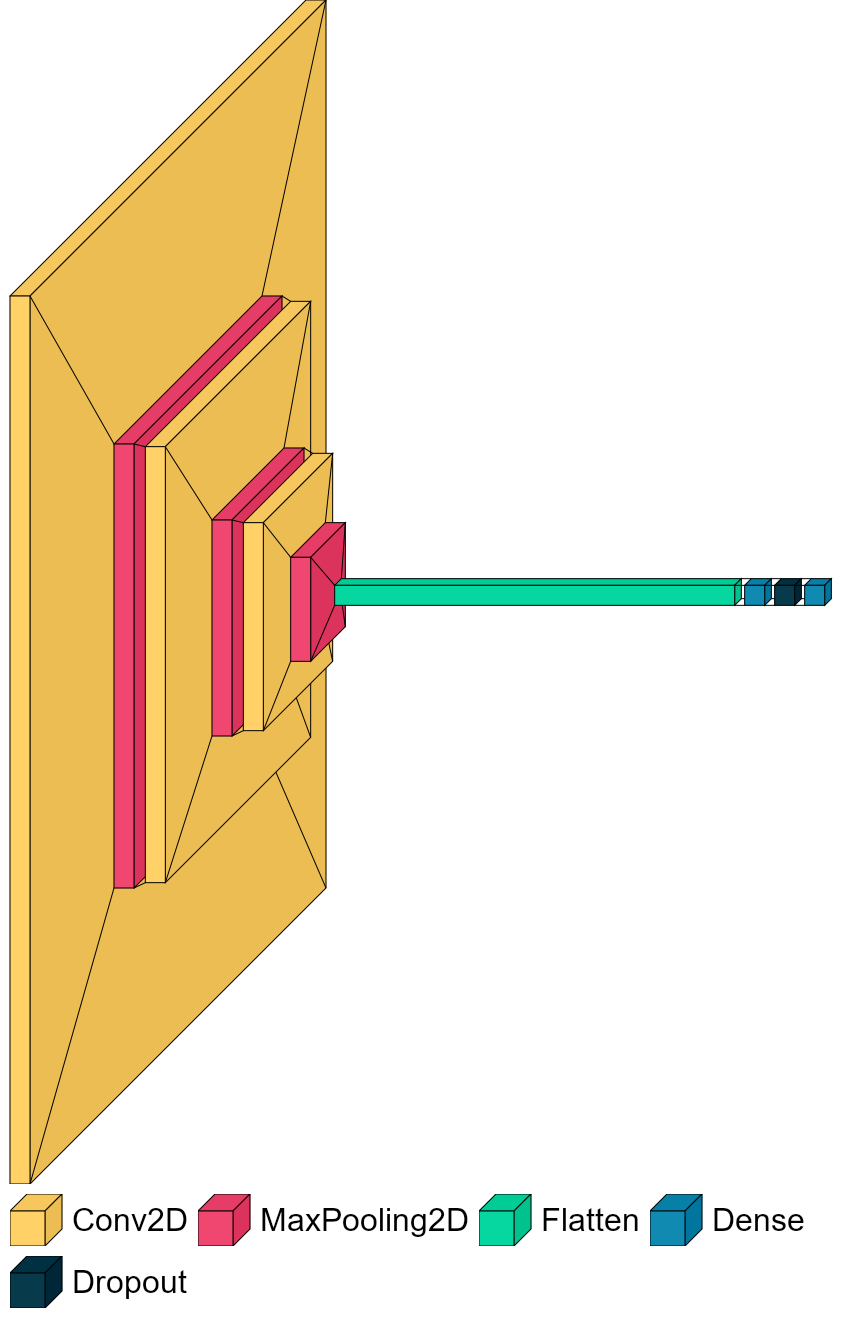

In [22]:
import visualkeras
from PIL import ImageFont

font = ImageFont.truetype("arial.ttf", 32)  # using comic sans is strictly prohibited!
visualkeras.layered_view(model, legend=True, font=font)  # font is optional!

## With Equation Graphs

In [25]:
# Directory containing your images
directory = 'C:/Users/Duhyeon/Desktop/UBC/UBC Research/Work_Learn/SPAs Data/Simulation Data/Pictures/Equation Trajectory Pictures'

# List all files in the directory
files = os.listdir(directory)

# Lists to store images and labels
images = []
labels = []

# Iterate over each file
for file in files:
    if file.endswith('.jpg') or file.endswith('.jpeg') or file.endswith('.png'):
        file_path = os.path.join(directory, file)
        # Read and preprocess the image
        image = cv2.imread(file_path)
        # convert the input image to grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
        # apply thresholding to convert grayscale to binary image
        ret,thresh = cv2.threshold(gray,224,224,0)
        
        # Preprocess the image
        preprocessed_image = preprocess_image(thresh)
        
        # Add the preprocessed image to the list of images
        images.append(preprocessed_image)

        label = file.split('.')[0]  # Extract label from file name
        labels.append(label)

# Convert lists to numpy arrays
images2Eval = np.array(images)
labels2Eval = np.array(labels)

In [26]:
np.shape(images2Eval)

(39, 224, 224)

In [27]:
# Prediction
pred_eval = model.predict(images2Eval)

# Decoding Predictions

maxarg2val_list = []
for i in range(len(pred_eval)):
    maxarg2val = np.argmax(pred_eval[i])
    maxarg2val_list.append(maxarg2val)

print(maxarg2val_list)
decoded_pred2Eval = le.inverse_transform(maxarg2val_list)
print(decoded_pred2Eval)

2/2 [==============================] - 0s 43ms/step
[0, 1, 5, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 22, 23, 25, 25, 26, 27, 29, 29, 30, 31, 33, 33, 34, 35, 36, 34, 38]
['DS10DS10_0_1' 'DS10DS10_2_0' 'DS10DS10_3_2' 'DS10DS10_3_0'
 'DS10DS10_3_1' 'DS10DS10_3_2' 'DS10DS10_6_1' 'DS10DS10_6_2'
 'DS10DS10_6_3' 'DS10DS30_2_1' 'DS10DS30_3_1' 'DS10DS30_3_2'
 'DS30DS30_2_1' 'DS30DS30_3_1' 'DS30DS30_3_2' 'DS30DS30_6_0'
 'DS30DS30_6_1' 'DS30DS30_6_2' 'DS30DS30_6_3' 'DS30E30_1_1' 'DS30E30_2_0'
 'DS30E30_2_2' 'DS30E30_2_2' 'DS30E30_3_0' 'DS30E30_3_2' 'DS30E30_3_2'
 'DS30E30_3_3' 'DS30E30_6_1' 'DS30E30_6_3' 'DS30E30_6_3' 'DS30E30_6_6'
 'E30DS30_0_1' 'E30DS30_3_1' 'E30DS30_3_1' 'E30DS30_3_2' 'E30DS30_6_0'
 'E30DS30_6_1' 'E30DS30_3_2' 'E30DS30_6_3']


In [28]:
# Calculate the number of correct predictions
correct_predictions = sum(labels2Eval == decoded_pred2Eval)

# Calculate the total number of predictions
total_predictions = len(labels2Eval)

# Calculate the percentage of correct predictions
accuracy_percent = (correct_predictions / total_predictions) * 100

# Calculate the percentage of incorrect predictions
incorrect_percent = 100 - accuracy_percent

# Print the results
print("Accuracy: {}%".format(accuracy_percent))
print("Incorrect: {}%".format(incorrect_percent))

Accuracy: 84.61538461538461%
Incorrect: 15.384615384615387%


## With 4 Arbitrary (Leaning) Trajactories

In [29]:
# Directory containing your images
directory = 'C:/Users/Duhyeon/Desktop/UBC/UBC Research/Work_Learn/SPAs Data/Simulation Data/Pictures/Arbitrary Trajectory Pictures'

# List all files in the directory
files = os.listdir(directory)

# Lists to store images and labels
images = []
labels = []

# Iterate over each file
for file in files:
    if file.endswith('.jpg') or file.endswith('.jpeg') or file.endswith('.png'):
        file_path = os.path.join(directory, file)
        # Read and preprocess the image
        image = cv2.imread(file_path)
        # convert the input image to grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
        # apply thresholding to convert grayscale to binary image
        ret,thresh = cv2.threshold(gray,224,224,0)
        
        # Preprocess the image
        preprocessed_image = preprocess_image(thresh)
        
        # Add the preprocessed image to the list of images
        images.append(preprocessed_image)
        # Assuming your file names contain the class label (e.g., 'cat', 'dog')
        label = file.split('.')[0]  # Extract label from file name
        labels.append(label)

# Convert lists to numpy arrays
images2Eval = np.array(images)
labels2Eval = np.array(labels)

In [30]:
np.shape(images2Eval)

(4, 224, 224)

In [31]:
labels2Eval

array(['DS10DS10_0_1_VS_DS30DS30_6_1', 'DS10DS30_3_1_VS_DS10DS30_2_1',
       'DS30DS30_6_1_VS_DS10DS30_3_1', 'E30DS30_6_3_VS_DS10DS10_0_1'],
      dtype='<U28')

In [32]:
# The prediction should be left trajactory
labels2Eval[0] = 'DS10DS10_0_1'
labels2Eval[1] = 'DS10DS30_3_1'
labels2Eval[2] = 'DS30DS30_6_1'
labels2Eval[3] = 'E30DS30_6_3'

In [33]:
labels2Eval

array(['DS10DS10_0_1', 'DS10DS30_3_1', 'DS30DS30_6_1', 'E30DS30_6_3'],
      dtype='<U28')

In [34]:
# Prediction
pred_eval = model.predict(images2Eval)

# Decoding Predictions

maxarg2val_list = []
for i in range(len(pred_eval)):
    maxarg2val = np.argmax(pred_eval[i])
    maxarg2val_list.append(maxarg2val)

print(maxarg2val_list)
decoded_pred2Eval = le.inverse_transform(maxarg2val_list)
print(decoded_pred2Eval)

1/1 [==============================] - 0s 48ms/step
[0, 10, 16, 38]
['DS10DS10_0_1' 'DS10DS30_3_1' 'DS30DS30_6_1' 'E30DS30_6_3']


In [35]:
# Function to find top 5 values and their indices in each row
def get_top_5_indices_and_values(array):
    top_5_indices = np.argsort(array)[-5:][::-1]
    top_5_decoded = le.inverse_transform(top_5_indices)
    top_5_values = array[top_5_indices]*100
    
    return top_5_indices, top_5_decoded, top_5_values, 

# Iterate through each row in the array and find top 5 indices and values
for i, row in enumerate(pred_eval):
    indices, configurations, values = get_top_5_indices_and_values(row)
    print(f"Row {i}:")
    print("Top 5 indices:", indices)
    print("Top 5 configurations: ", configurations)
    print("Top 5 values:", values)
    print()

Row 0:
Top 5 indices: [ 0 16 38 14  4]
Top 5 configurations:  ['DS10DS10_0_1' 'DS30DS30_6_1' 'E30DS30_6_3' 'DS30DS30_3_2' 'DS10DS10_3_1']
Top 5 values: [9.7862404e+01 1.9482810e+00 1.2198684e-01 1.2445528e-02 7.4818265e-03]

Row 1:
Top 5 indices: [10  9 16 17 23]
Top 5 configurations:  ['DS10DS30_3_1' 'DS10DS30_2_1' 'DS30DS30_6_1' 'DS30DS30_6_2' 'DS30E30_3_0']
Top 5 values: [94.08691     2.1623747   0.9248381   0.78307045  0.46796766]

Row 2:
Top 5 indices: [16 10  0 11 20]
Top 5 configurations:  ['DS30DS30_6_1' 'DS10DS30_3_1' 'DS10DS10_0_1' 'DS10DS30_3_2' 'DS30E30_2_0']
Top 5 values: [9.7168106e+01 2.5423701e+00 8.1826903e-02 4.4039622e-02 2.2541318e-02]

Row 3:
Top 5 indices: [38  0 37 19 27]
Top 5 configurations:  ['E30DS30_6_3' 'DS10DS10_0_1' 'E30DS30_6_2' 'DS30E30_1_1' 'DS30E30_6_1']
Top 5 values: [9.9562088e+01 3.1344396e-01 7.7231981e-02 1.8475248e-02 4.9387636e-03]



In [36]:
# Calculate the number of correct predictions
correct_predictions = sum(labels2Eval == decoded_pred2Eval)

# Calculate the total number of predictions
total_predictions = len(labels2Eval)

# Calculate the percentage of correct predictions
accuracy_percent = (correct_predictions / total_predictions) * 100

# Calculate the percentage of incorrect predictions
incorrect_percent = 100 - accuracy_percent

# Print the results
print("Accuracy: {}%".format(accuracy_percent))
print("Incorrect: {}%".format(incorrect_percent))

Accuracy: 100.0%
Incorrect: 0.0%


# Validating with Increasement Dataset (0%, 1%, 2%, and 5%)

In [37]:
directory = 'C:/Users/Duhyeon/Desktop/UBC/UBC Research/Work_Learn/SPAs Data/Simulation Data/Pictures/Increasement Picture/0%'

# List all files in the directory
files = os.listdir(directory)

# Lists to store images and labels
images_0 = []
labels_0 = []

# Iterate over each file
for file in files:
    if file.endswith('.jpg') or file.endswith('.jpeg') or file.endswith('.png'):
        file_path = os.path.join(directory, file)
        # Read the image
        image = cv2.imread(file_path)
        
        # convert the input image to grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
        # apply thresholding to convert grayscale to binary image
        ret,thresh = cv2.threshold(gray,224,224,0)
        
        # Preprocess the image
        preprocessed_image = preprocess_image(thresh)
        
        # Add the preprocessed image to the list of images
        images_0.append(preprocessed_image)

        label = file.split('.')[0]  # Extract label from file name
        labels_0.append(label)

# Convert lists to numpy arrays
images_0 = np.array(images_0)
labels_0 = np.array(labels_0)

In [38]:
le = preprocessing.LabelEncoder()

# Fit the encoder to the categories and transform (encode) them
encoded_labels_0 = le.fit_transform(labels_0)

# Now to decode, use inverse_transform
decoded_labels_0 = le.inverse_transform(encoded_labels_0)

# Print encoded and decoded results for comparison
print("Encoded Labels:", encoded_labels_0)
print("Decoded Labels:", decoded_labels_0)

Encoded Labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38]
Decoded Labels: ['DS10DS10_0_1' 'DS10DS10_2_0' 'DS10DS10_2_1' 'DS10DS10_3_0'
 'DS10DS10_3_1' 'DS10DS10_3_2' 'DS10DS10_6_1' 'DS10DS10_6_2'
 'DS10DS10_6_3' 'DS10DS30_2_1' 'DS10DS30_3_1' 'DS10DS30_3_2'
 'DS30DS30_2_1' 'DS30DS30_3_1' 'DS30DS30_3_2' 'DS30DS30_6_0'
 'DS30DS30_6_1' 'DS30DS30_6_2' 'DS30DS30_6_3' 'DS30E30_1_1' 'DS30E30_2_0'
 'DS30E30_2_1' 'DS30E30_2_2' 'DS30E30_3_0' 'DS30E30_3_1' 'DS30E30_3_2'
 'DS30E30_3_3' 'DS30E30_6_1' 'DS30E30_6_2' 'DS30E30_6_3' 'DS30E30_6_6'
 'E30DS30_0_1' 'E30DS30_2_1' 'E30DS30_3_1' 'E30DS30_3_2' 'E30DS30_6_0'
 'E30DS30_6_1' 'E30DS30_6_2' 'E30DS30_6_3']


In [39]:
# Define CNN model architecture
model_0 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(102, activation='softmax') # Number has to be changed
])

In [40]:
# Compile the model
model_0.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [41]:
# Train the model
history_0 = model_0.fit(images_0, encoded_labels_0, epochs=50,
                    validation_data=(images_0, encoded_labels_0),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/50
2/2 [==============================] - ETA: 0s - loss: 5.1579 - accuracy: 0.0256

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 4s 2s/step - loss: 5.1579 - accuracy: 0.0256 - val_loss: 4.7698 - val_accuracy: 0.0256
Epoch 2/50
2/2 [==============================] - ETA: 0s - loss: 5.0895 - accuracy: 0.0256

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 2s 2s/step - loss: 5.0895 - accuracy: 0.0256 - val_loss: 4.5063 - val_accuracy: 0.0256
Epoch 3/50
2/2 [==============================] - ETA: 0s - loss: 4.5385 - accuracy: 0.0000e+00

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 3s 2s/step - loss: 4.5385 - accuracy: 0.0000e+00 - val_loss: 4.5360 - val_accuracy: 0.0256
Epoch 4/50
2/2 [==============================] - ETA: 0s - loss: 4.5671 - accuracy: 0.0000e+00

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 3s 2s/step - loss: 4.5671 - accuracy: 0.0000e+00 - val_loss: 4.5709 - val_accuracy: 0.0256
Epoch 5/50
2/2 [==============================] - ETA: 0s - loss: 4.5517 - accuracy: 0.0256

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 2s 2s/step - loss: 4.5517 - accuracy: 0.0256 - val_loss: 4.5386 - val_accuracy: 0.0256
Epoch 6/50
2/2 [==============================] - ETA: 0s - loss: 4.5525 - accuracy: 0.0256

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 2s 2s/step - loss: 4.5525 - accuracy: 0.0256 - val_loss: 4.4445 - val_accuracy: 0.0256
Epoch 7/50
2/2 [==============================] - ETA: 0s - loss: 4.4354 - accuracy: 0.0000e+00

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 2s 2s/step - loss: 4.4354 - accuracy: 0.0000e+00 - val_loss: 4.3525 - val_accuracy: 0.0256
Epoch 8/50
2/2 [==============================] - ETA: 0s - loss: 4.5664 - accuracy: 0.0000e+00

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 2s 1s/step - loss: 4.5664 - accuracy: 0.0000e+00 - val_loss: 4.3217 - val_accuracy: 0.0256
Epoch 9/50
2/2 [==============================] - ETA: 0s - loss: 4.5141 - accuracy: 0.0256    

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 2s 2s/step - loss: 4.5141 - accuracy: 0.0256 - val_loss: 4.2918 - val_accuracy: 0.0256
Epoch 10/50
2/2 [==============================] - ETA: 0s - loss: 4.4751 - accuracy: 0.0000e+00

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 2s 1s/step - loss: 4.4751 - accuracy: 0.0000e+00 - val_loss: 4.2704 - val_accuracy: 0.0256
Epoch 11/50
2/2 [==============================] - ETA: 0s - loss: 4.3839 - accuracy: 0.0000e+00

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 2s 2s/step - loss: 4.3839 - accuracy: 0.0000e+00 - val_loss: 4.2555 - val_accuracy: 0.0256
Epoch 12/50
2/2 [==============================] - ETA: 0s - loss: 4.3191 - accuracy: 0.0256    

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 2s 2s/step - loss: 4.3191 - accuracy: 0.0256 - val_loss: 4.2398 - val_accuracy: 0.0256
Epoch 13/50
2/2 [==============================] - ETA: 0s - loss: 4.2935 - accuracy: 0.0000e+00

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 2s 2s/step - loss: 4.2935 - accuracy: 0.0000e+00 - val_loss: 4.2116 - val_accuracy: 0.0256
Epoch 14/50
2/2 [==============================] - ETA: 0s - loss: 4.2919 - accuracy: 0.0256

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 2s 2s/step - loss: 4.2919 - accuracy: 0.0256 - val_loss: 4.1900 - val_accuracy: 0.0256
Epoch 15/50
2/2 [==============================] - ETA: 0s - loss: 4.2493 - accuracy: 0.0513

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 2s 2s/step - loss: 4.2493 - accuracy: 0.0513 - val_loss: 4.1771 - val_accuracy: 0.0256
Epoch 16/50
2/2 [==============================] - ETA: 0s - loss: 4.2078 - accuracy: 0.0000e+00

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 2s 1s/step - loss: 4.2078 - accuracy: 0.0000e+00 - val_loss: 4.1332 - val_accuracy: 0.0256
Epoch 17/50
2/2 [==============================] - ETA: 0s - loss: 4.2091 - accuracy: 0.0000e+00

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 2s 2s/step - loss: 4.2091 - accuracy: 0.0000e+00 - val_loss: 4.0791 - val_accuracy: 0.0256
Epoch 18/50
2/2 [==============================] - ETA: 0s - loss: 4.3548 - accuracy: 0.0000e+00

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 2s 2s/step - loss: 4.3548 - accuracy: 0.0000e+00 - val_loss: 4.0692 - val_accuracy: 0.0256
Epoch 19/50
2/2 [==============================] - ETA: 0s - loss: 4.2464 - accuracy: 0.0000e+00

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 2s 2s/step - loss: 4.2464 - accuracy: 0.0000e+00 - val_loss: 4.0666 - val_accuracy: 0.0256
Epoch 20/50
2/2 [==============================] - ETA: 0s - loss: 4.1158 - accuracy: 0.0769

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 2s 2s/step - loss: 4.1158 - accuracy: 0.0769 - val_loss: 4.0048 - val_accuracy: 0.0256
Epoch 21/50
2/2 [==============================] - ETA: 0s - loss: 4.0574 - accuracy: 0.0769

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 3s 2s/step - loss: 4.0574 - accuracy: 0.0769 - val_loss: 3.8670 - val_accuracy: 0.0513
Epoch 22/50
2/2 [==============================] - ETA: 0s - loss: 4.0277 - accuracy: 0.0513

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 2s 2s/step - loss: 4.0277 - accuracy: 0.0513 - val_loss: 3.7902 - val_accuracy: 0.0513
Epoch 23/50
2/2 [==============================] - ETA: 0s - loss: 3.7961 - accuracy: 0.0256

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 3s 2s/step - loss: 3.7961 - accuracy: 0.0256 - val_loss: 3.7167 - val_accuracy: 0.1026
Epoch 24/50
2/2 [==============================] - ETA: 0s - loss: 3.7947 - accuracy: 0.0513

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 2s 2s/step - loss: 3.7947 - accuracy: 0.0513 - val_loss: 3.6233 - val_accuracy: 0.1026
Epoch 25/50
2/2 [==============================] - ETA: 0s - loss: 3.8178 - accuracy: 0.0000e+00

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 2s 2s/step - loss: 3.8178 - accuracy: 0.0000e+00 - val_loss: 3.5322 - val_accuracy: 0.1538
Epoch 26/50
2/2 [==============================] - ETA: 0s - loss: 3.6471 - accuracy: 0.0769

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 2s 2s/step - loss: 3.6471 - accuracy: 0.0769 - val_loss: 3.2545 - val_accuracy: 0.1538
Epoch 27/50
2/2 [==============================] - ETA: 0s - loss: 3.3712 - accuracy: 0.1538

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 2s 2s/step - loss: 3.3712 - accuracy: 0.1538 - val_loss: 3.0044 - val_accuracy: 0.1538
Epoch 28/50
2/2 [==============================] - ETA: 0s - loss: 3.3595 - accuracy: 0.0769

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 2s 2s/step - loss: 3.3595 - accuracy: 0.0769 - val_loss: 2.8183 - val_accuracy: 0.3077
Epoch 29/50
2/2 [==============================] - ETA: 0s - loss: 2.9988 - accuracy: 0.1538

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 2s 2s/step - loss: 2.9988 - accuracy: 0.1538 - val_loss: 2.5803 - val_accuracy: 0.3590
Epoch 30/50
2/2 [==============================] - ETA: 0s - loss: 2.9403 - accuracy: 0.2564

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 2s 2s/step - loss: 2.9403 - accuracy: 0.2564 - val_loss: 2.3590 - val_accuracy: 0.3333
Epoch 31/50
2/2 [==============================] - ETA: 0s - loss: 2.9834 - accuracy: 0.2821

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 2s 2s/step - loss: 2.9834 - accuracy: 0.2821 - val_loss: 2.1922 - val_accuracy: 0.4103
Epoch 32/50
2/2 [==============================] - ETA: 0s - loss: 2.6905 - accuracy: 0.3077

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 3s 2s/step - loss: 2.6905 - accuracy: 0.3077 - val_loss: 1.9300 - val_accuracy: 0.4615
Epoch 33/50
2/2 [==============================] - ETA: 0s - loss: 2.5624 - accuracy: 0.3077

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 2s 2s/step - loss: 2.5624 - accuracy: 0.3077 - val_loss: 1.6782 - val_accuracy: 0.5128
Epoch 34/50
2/2 [==============================] - ETA: 0s - loss: 2.1264 - accuracy: 0.4103

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 2s 2s/step - loss: 2.1264 - accuracy: 0.4103 - val_loss: 1.5058 - val_accuracy: 0.5641
Epoch 35/50
2/2 [==============================] - ETA: 0s - loss: 2.2183 - accuracy: 0.3590

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 2s 2s/step - loss: 2.2183 - accuracy: 0.3590 - val_loss: 1.3076 - val_accuracy: 0.6667
Epoch 36/50
2/2 [==============================] - ETA: 0s - loss: 1.6018 - accuracy: 0.4615

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 2s 2s/step - loss: 1.6018 - accuracy: 0.4615 - val_loss: 1.0990 - val_accuracy: 0.5897
Epoch 37/50
2/2 [==============================] - ETA: 0s - loss: 1.9666 - accuracy: 0.4103

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 3s 2s/step - loss: 1.9666 - accuracy: 0.4103 - val_loss: 0.9741 - val_accuracy: 0.6154
Epoch 38/50
2/2 [==============================] - ETA: 0s - loss: 1.5572 - accuracy: 0.4615

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 2s 2s/step - loss: 1.5572 - accuracy: 0.4615 - val_loss: 0.9022 - val_accuracy: 0.6410
Epoch 39/50
2/2 [==============================] - ETA: 0s - loss: 1.7963 - accuracy: 0.4103

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 2s 2s/step - loss: 1.7963 - accuracy: 0.4103 - val_loss: 0.8570 - val_accuracy: 0.6667
Epoch 40/50
2/2 [==============================] - ETA: 0s - loss: 1.3608 - accuracy: 0.4359

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 2s 2s/step - loss: 1.3608 - accuracy: 0.4359 - val_loss: 0.8348 - val_accuracy: 0.6923
Epoch 41/50
2/2 [==============================] - ETA: 0s - loss: 1.2313 - accuracy: 0.6410

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 2s 2s/step - loss: 1.2313 - accuracy: 0.6410 - val_loss: 0.7858 - val_accuracy: 0.7179
Epoch 42/50
2/2 [==============================] - ETA: 0s - loss: 1.3383 - accuracy: 0.5641

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 3s 2s/step - loss: 1.3383 - accuracy: 0.5641 - val_loss: 0.7039 - val_accuracy: 0.7692
Epoch 43/50
2/2 [==============================] - ETA: 0s - loss: 1.2199 - accuracy: 0.6154

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 3s 2s/step - loss: 1.2199 - accuracy: 0.6154 - val_loss: 0.6241 - val_accuracy: 0.7949
Epoch 44/50
2/2 [==============================] - ETA: 0s - loss: 1.1036 - accuracy: 0.6667

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 3s 2s/step - loss: 1.1036 - accuracy: 0.6667 - val_loss: 0.6075 - val_accuracy: 0.8205
Epoch 45/50
2/2 [==============================] - ETA: 0s - loss: 1.1679 - accuracy: 0.5897

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 3s 2s/step - loss: 1.1679 - accuracy: 0.5897 - val_loss: 0.6084 - val_accuracy: 0.7436
Epoch 46/50
2/2 [==============================] - ETA: 0s - loss: 1.0552 - accuracy: 0.7179

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 2s 2s/step - loss: 1.0552 - accuracy: 0.7179 - val_loss: 0.5996 - val_accuracy: 0.7436
Epoch 47/50
2/2 [==============================] - ETA: 0s - loss: 0.8511 - accuracy: 0.7436

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 3s 2s/step - loss: 0.8511 - accuracy: 0.7436 - val_loss: 0.5377 - val_accuracy: 0.7692
Epoch 48/50
2/2 [==============================] - ETA: 0s - loss: 1.1636 - accuracy: 0.6667

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 4s 3s/step - loss: 1.1636 - accuracy: 0.6667 - val_loss: 0.4521 - val_accuracy: 0.7949
Epoch 49/50
2/2 [==============================] - ETA: 0s - loss: 0.8532 - accuracy: 0.6667

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 3s 2s/step - loss: 0.8532 - accuracy: 0.6667 - val_loss: 0.4080 - val_accuracy: 0.8462
Epoch 50/50
2/2 [==============================] - ETA: 0s - loss: 0.6906 - accuracy: 0.7692

INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


INFO:tensorflow:Assets written to: patience=10, restore_best_weights=True\assets


2/2 [==============================] - 2s 2s/step - loss: 0.6906 - accuracy: 0.7692 - val_loss: 0.3937 - val_accuracy: 0.8205


## 0%

In [57]:
directory = 'C:/Users/Duhyeon/Desktop/UBC/UBC Research/Work_Learn/SPAs Data/Simulation Data/Pictures/Increasement Picture/0%'

# List all files in the directory
files = os.listdir(directory)

# Lists to store images and labels
images_0 = []
labels_0 = []

# Iterate over each file
for file in files:
    if file.endswith('.jpg') or file.endswith('.jpeg') or file.endswith('.png'):
        file_path = os.path.join(directory, file)
        # Read the image
        image = cv2.imread(file_path)
        
        # convert the input image to grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
        # apply thresholding to convert grayscale to binary image
        ret,thresh = cv2.threshold(gray,224,224,0)
        
        # Preprocess the image
        preprocessed_image = preprocess_image(thresh)
        
        # Add the preprocessed image to the list of images
        images_0.append(preprocessed_image)

        label = file.split('.')[0]  # Extract label from file name
        labels_0.append(label)

# Convert lists to numpy arrays
images_0 = np.array(images_0)
labels_0 = np.array(labels_0)

In [58]:
# Prediction
pred_0 = model_0.predict(images_0)

# Decoding Predictions

maxarg2val_list = []
for i in range(len(pred_0)):
    maxarg2val = np.argmax(pred_0[i])
    maxarg2val_list.append(maxarg2val)

decoded_pred_0 = le.inverse_transform(maxarg2val_list)
print(decoded_pred_0)

2/2 [==============================] - 0s 40ms/step
['DS10DS10_0_1' 'DS10DS10_2_0' 'DS10DS10_2_1' 'DS10DS10_3_0'
 'DS10DS10_3_1' 'DS10DS10_2_1' 'DS30DS30_6_2' 'DS10DS10_6_2'
 'DS10DS10_6_3' 'DS10DS30_2_1' 'DS10DS30_3_1' 'DS10DS30_3_2'
 'DS30DS30_2_1' 'DS30DS30_3_1' 'DS30DS30_3_2' 'DS30DS30_6_0'
 'DS30DS30_6_1' 'DS30DS30_6_2' 'DS30DS30_6_3' 'DS30E30_1_1' 'DS30E30_2_0'
 'DS30E30_2_2' 'DS30E30_2_2' 'DS30E30_3_0' 'DS30E30_3_1' 'DS30E30_3_3'
 'DS30E30_3_3' 'DS30E30_6_1' 'DS30E30_6_2' 'DS30E30_6_2' 'DS30E30_6_6'
 'E30DS30_0_1' 'E30DS30_2_1' 'E30DS30_2_1' 'E30DS30_3_2' 'E30DS30_6_0'
 'E30DS30_6_1' 'E30DS30_3_2' 'E30DS30_6_3']


In [59]:
# Calculate the number of correct predictions
correct_predictions = sum(decoded_pred_0 == labels_0)

# Calculate the total number of predictions
total_predictions = len(labels_0)

# Calculate the percentage of correct predictions
accuracy_percent_0 = (correct_predictions / total_predictions) * 100

# Calculate the percentage of incorrect predictions
incorrect_percent_0 = 100 - accuracy_percent_0

# Print the results
print("Accuracy: {}%".format(accuracy_percent_0))
print("Incorrect: {}%".format(incorrect_percent_0))

Accuracy: 82.05128205128204%
Incorrect: 17.948717948717956%


## 1%

In [60]:
directory = 'C:/Users/Duhyeon/Desktop/UBC/UBC Research/Work_Learn/SPAs Data/Simulation Data/Pictures/Increasement Picture/1%'

# List all files in the directory
files = os.listdir(directory)

# Lists to store images and labels
images_1 = []
labels_1 = []

# Iterate over each file
for file in files:
    if file.endswith('.jpg') or file.endswith('.jpeg') or file.endswith('.png'):
        file_path = os.path.join(directory, file)
        # Read the image
        image = cv2.imread(file_path)
        
        # convert the input image to grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
        # apply thresholding to convert grayscale to binary image
        ret,thresh = cv2.threshold(gray,224,224,0)
        
        # Preprocess the image
        preprocessed_image = preprocess_image(thresh)
        
        # Add the preprocessed image to the list of images
        images_1.append(preprocessed_image)

        label = file.split('.')[0]  # Extract label from file name
        labels_1.append(label)

# Convert lists to numpy arrays
images_1 = np.array(images_1)
labels_1 = np.array(labels_1)

In [61]:
# Prediction
pred_1 = model_0.predict(images_1)

# Decoding Predictions

maxarg2val_list = []
for i in range(len(pred_1)):
    maxarg2val = np.argmax(pred_1[i])
    maxarg2val_list.append(maxarg2val)

decoded_pred_1 = le.inverse_transform(maxarg2val_list)
print(decoded_pred_1)

2/2 [==============================] - 0s 41ms/step
['DS10DS10_0_1' 'DS10DS10_2_0' 'DS10DS10_2_1' 'DS10DS10_3_0'
 'DS10DS10_3_1' 'DS10DS10_2_1' 'DS30DS30_6_2' 'DS10DS10_6_2'
 'DS10DS10_6_3' 'DS10DS30_2_1' 'DS10DS30_3_1' 'DS10DS30_3_2'
 'DS30DS30_2_1' 'DS30DS30_3_1' 'DS30DS30_3_2' 'DS30DS30_6_0'
 'DS30DS30_6_1' 'DS30DS30_6_2' 'DS30DS30_6_3' 'DS30E30_1_1' 'DS30E30_2_0'
 'DS30E30_2_2' 'DS30E30_2_2' 'DS30E30_3_0' 'DS30E30_3_3' 'DS30E30_3_3'
 'DS30E30_3_3' 'DS30E30_6_1' 'DS30E30_6_2' 'DS30E30_6_2' 'DS30E30_6_6'
 'E30DS30_0_1' 'E30DS30_2_1' 'E30DS30_2_1' 'E30DS30_3_2' 'E30DS30_6_0'
 'E30DS30_6_1' 'E30DS30_3_2' 'E30DS30_6_3']


In [62]:
# Calculate the number of correct predictions
correct_predictions = sum(decoded_pred_1 == labels_1)

# Calculate the total number of predictions
total_predictions = len(labels_1)

# Calculate the percentage of correct predictions
accuracy_percent_1 = (correct_predictions / total_predictions) * 100

# Calculate the percentage of incorrect predictions
incorrect_percent_1 = 100 - accuracy_percent_1

# Print the results
print("Accuracy: {}%".format(accuracy_percent_1))
print("Incorrect: {}%".format(incorrect_percent_1))

Accuracy: 79.48717948717949%
Incorrect: 20.51282051282051%


## 2%

In [63]:
directory = 'C:/Users/Duhyeon/Desktop/UBC/UBC Research/Work_Learn/SPAs Data/Simulation Data/Pictures/Increasement Picture/2%'

# List all files in the directory
files = os.listdir(directory)

# Lists to store images and labels
images_2 = []
labels_2 = []

# Iterate over each file
for file in files:
    if file.endswith('.jpg') or file.endswith('.jpeg') or file.endswith('.png'):
        file_path = os.path.join(directory, file)
        # Read the image
        image = cv2.imread(file_path)
        
        # convert the input image to grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
        # apply thresholding to convert grayscale to binary image
        ret,thresh = cv2.threshold(gray,224,224,0)
        
        # Preprocess the image
        preprocessed_image = preprocess_image(thresh)
        
        # Add the preprocessed image to the list of images
        images_2.append(preprocessed_image)

        label = file.split('.')[0]  # Extract label from file name
        labels_2.append(label)

# Convert lists to numpy arrays
images_2 = np.array(images_2)
labels_2 = np.array(labels_2)

In [64]:
# Prediction
pred_2 = model_0.predict(images_2)

# Decoding Predictions

maxarg2val_list = []
for i in range(len(pred_2)):
    maxarg2val = np.argmax(pred_2[i])
    maxarg2val_list.append(maxarg2val)

decoded_pred_2 = le.inverse_transform(maxarg2val_list)
print(decoded_pred_2)

2/2 [==============================] - 0s 44ms/step
['DS10DS10_0_1' 'DS10DS10_2_0' 'DS10DS10_2_1' 'DS10DS10_3_0'
 'DS10DS10_3_1' 'DS10DS10_2_1' 'DS30DS30_6_2' 'DS10DS10_6_2'
 'DS10DS10_6_3' 'DS10DS30_2_1' 'DS10DS30_3_1' 'DS10DS30_3_2'
 'DS30DS30_2_1' 'DS30DS30_3_1' 'DS30DS30_3_2' 'DS30DS30_6_0'
 'DS30DS30_6_1' 'DS30DS30_6_2' 'DS30DS30_6_3' 'DS30E30_1_1' 'DS30E30_2_0'
 'DS30E30_2_2' 'DS30E30_2_2' 'DS30E30_2_1' 'DS30E30_3_3' 'DS30E30_3_3'
 'DS30E30_3_3' 'DS30E30_6_1' 'DS30E30_6_2' 'DS30E30_6_2' 'DS30E30_6_6'
 'E30DS30_0_1' 'E30DS30_6_1' 'E30DS30_6_1' 'E30DS30_3_2' 'E30DS30_6_0'
 'E30DS30_6_1' 'E30DS30_3_2' 'E30DS30_6_3']


In [65]:
# Calculate the number of correct predictions
correct_predictions = sum(decoded_pred_2 == labels_2)

# Calculate the total number of predictions
total_predictions = len(labels_2)

# Calculate the percentage of correct predictions
accuracy_percent_2 = (correct_predictions / total_predictions) * 100

# Calculate the percentage of incorrect predictions
incorrect_percent_2 = 100 - accuracy_percent_2

# Print the results
print("Accuracy: {}%".format(accuracy_percent_2))
print("Incorrect: {}%".format(incorrect_percent_2))

Accuracy: 74.35897435897436%
Incorrect: 25.641025641025635%


## 5%

In [66]:
directory = 'C:/Users/Duhyeon/Desktop/UBC/UBC Research/Work_Learn/SPAs Data/Simulation Data/Pictures/Increasement Picture/5%'

# List all files in the directory
files = os.listdir(directory)

# Lists to store images and labels
images_5 = []
labels_5 = []

# Iterate over each file
for file in files:
    if file.endswith('.jpg') or file.endswith('.jpeg') or file.endswith('.png'):
        file_path = os.path.join(directory, file)
        # Read the image
        image = cv2.imread(file_path)
        
        # convert the input image to grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
        # apply thresholding to convert grayscale to binary image
        ret,thresh = cv2.threshold(gray,224,224,0)
        
        # Preprocess the image
        preprocessed_image = preprocess_image(thresh)
        
        # Add the preprocessed image to the list of images
        images_5.append(preprocessed_image)

        label = file.split('.')[0]  # Extract label from file name
        labels_5.append(label)

# Convert lists to numpy arrays
images_5 = np.array(images_5)
labels_5 = np.array(labels_5)

In [67]:
# Prediction
pred_5 = model_0.predict(images_5)

# Decoding Predictions

maxarg2val_list = []
for i in range(len(pred_5)):
    maxarg2val = np.argmax(pred_5[i])
    maxarg2val_list.append(maxarg2val)

decoded_pred_5 = le.inverse_transform(maxarg2val_list)
print(decoded_pred_5)

2/2 [==============================] - 0s 46ms/step
['DS10DS10_0_1' 'DS10DS10_2_0' 'DS10DS10_2_1' 'DS10DS10_3_0'
 'DS10DS10_3_1' 'DS10DS10_2_1' 'DS30DS30_6_2' 'DS30DS30_6_3'
 'DS30DS30_3_1' 'DS10DS30_2_1' 'DS10DS30_3_1' 'DS10DS30_3_2'
 'DS30DS30_2_1' 'DS30DS30_3_1' 'DS30DS30_3_2' 'DS30DS30_6_0'
 'DS30DS30_6_1' 'DS30DS30_6_2' 'DS30DS30_6_3' 'DS30E30_1_1' 'DS30E30_1_1'
 'DS30E30_2_0' 'DS30E30_2_0' 'DS30E30_2_2' 'DS30E30_3_3' 'DS30E30_3_3'
 'DS30E30_3_0' 'DS30E30_6_2' 'DS30E30_6_6' 'DS30E30_6_6' 'DS30DS30_6_0'
 'E30DS30_2_1' 'E30DS30_6_1' 'E30DS30_6_1' 'E30DS30_0_1' 'E30DS30_6_0'
 'E30DS30_6_1' 'E30DS30_0_1' 'E30DS30_6_3']


In [68]:
# Calculate the number of correct predictions
correct_predictions = sum(decoded_pred_5 == labels_5)

# Calculate the total number of predictions
total_predictions = len(labels_5)

# Calculate the percentage of correct predictions
accuracy_percent_5 = (correct_predictions / total_predictions) * 100

# Calculate the percentage of incorrect predictions
incorrect_percent_5 = 100 - accuracy_percent_5

# Print the results
print("Accuracy: {}%".format(accuracy_percent_5))
print("Incorrect: {}%".format(incorrect_percent_5))

Accuracy: 48.717948717948715%
Incorrect: 51.282051282051285%


## Accuracies for 0%, 1%, 2%, and 5%

In [69]:
print("0% Accuracy: {}%".format(accuracy_percent_0))
print("1% Accuracy: {}%".format(accuracy_percent_1))
print("2% Accuracy: {}%".format(accuracy_percent_2))
print("5% Accuracy: {}%".format(accuracy_percent_5))

0% Accuracy: 82.05128205128204%
1% Accuracy: 79.48717948717949%
2% Accuracy: 74.35897435897436%
5% Accuracy: 48.717948717948715%
